Sinkhorn distance: 1.000


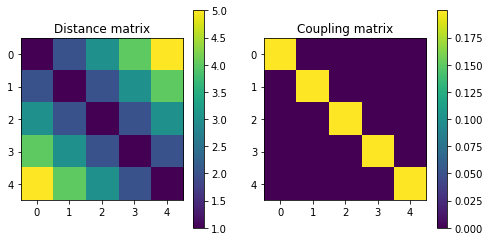

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from wasserstein import SinkhornDistance, plot_shinkhorn_result, show_assignments


n_points = 5
a = np.array([[i, 0] for i in range(n_points)])
b = np.array([[i, 1] for i in range(n_points)])
np.random.seed(42)

x = torch.tensor(a, dtype=torch.float)
y = torch.tensor(b, dtype=torch.float)

sinkhorn = SinkhornDistance(eps=0.1, max_iter=100)
dist, P, C = sinkhorn(x, y)
print("Sinkhorn distance: {:.3f}".format(dist.item()))

plot_shinkhorn_result(P, C)


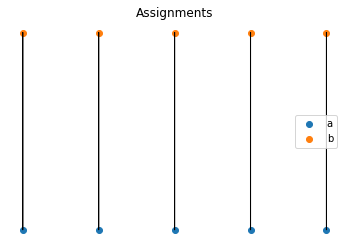

In [2]:
show_assignments(a,b, P)

### Random Datapoints

Sinkhorn distance: 5.379


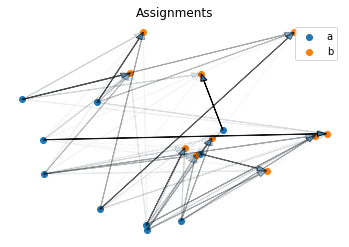

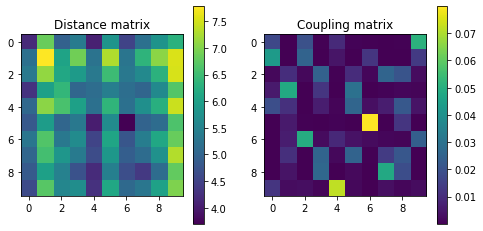

In [3]:
a = np.random.random(size=(10,10))
b = np.random.random(size=(10,10)) + 0.5


x = torch.tensor(a, dtype=torch.float)
y = torch.tensor(b, dtype=torch.float)

sinkhorn = SinkhornDistance(eps=0.1, max_iter=100)
dist, P, C = sinkhorn(x, y)
print("Sinkhorn distance: {:.3f}".format(dist.item()))

show_assignments(a,b, P, arrow=True)
plot_shinkhorn_result(P, C)


### Probabilities 

Sinkhorn distance: 0.356


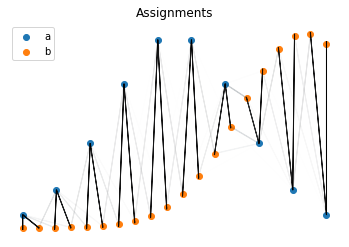

<Figure size 432x288 with 0 Axes>

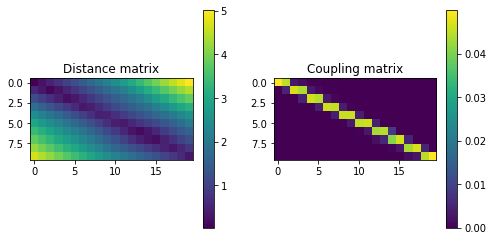

In [4]:

from scipy.stats import norm
num_a = 10 
num_b = 20 

a_x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), num_a).reshape(num_a, 1)
b_x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), num_b).reshape(num_b, 1)
a = np.hstack([a_x, norm.pdf(a_x)])
b = np.hstack([b_x, norm.pdf(b_x, 2)])
x = torch.tensor(a, dtype=torch.float)
y = torch.tensor(b, dtype=torch.float)

sinkhorn = SinkhornDistance(eps=0.1, max_iter=100)
dist, P, C = sinkhorn(x, y)
print("Sinkhorn distance: {:.3f}".format(dist.item()))

show_assignments(a,b, P, arrow=False)
plt.figure()
plot_shinkhorn_result(P, C)


In [9]:

from scipy.stats import norm, wasserstein_distance
for num_a, num_b in zip(range(5, 106, 20), range(105, 4, -20)):

    a_x = np.random.random(size=(num_a)).reshape(num_a, 1)
    b_x = np.random.random(size=(num_b)).reshape(num_b, 1)+2

    a = np.hstack([np.zeros(shape=(num_a, 1)), a_x])
    b = np.hstack([np.zeros(shape=(num_b, 1)), b_x])
    
    x = torch.tensor(a, dtype=torch.float)
    y = torch.tensor(b, dtype=torch.float)

    sinkhorn = SinkhornDistance(eps=0.1, max_iter=100, reduction='none', p=1)
    dist, P, C = sinkhorn(x, y)
    print(num_a, num_b, "| Sinkhorn distance: {:.3f}".format(dist.item()), " | scipy:", "%.3f"%wasserstein_distance(a_x[:,0], b_x[:,0]))


5 105 | Sinkhorn distance: 1.776  | scipy: 1.776
25 85 | Sinkhorn distance: 1.859  | scipy: 1.859
45 65 | Sinkhorn distance: 1.998  | scipy: 1.998
65 45 | Sinkhorn distance: 2.041  | scipy: 2.041
85 25 | Sinkhorn distance: 1.917  | scipy: 1.917
105 5 | Sinkhorn distance: 2.027  | scipy: 2.027
